#### Correr notebook "Datos"

In [ ]:
%run Datos.ipynb

Total de indicadores de educación nacionales: 10
Total de indicadores de población nacionales: 3
Total de indicadores de población para todos los estados: 3
Total de indicadores de educación para todos los estados: 9


#### Diccionario de indicadores escogidos

In [ ]:
dic_indicadores

{1: [1002000041, 'Porcentaje de personas de 15 años y más alfabetas'],
 2: [1005000038,
  'Grado promedio de escolaridad de la población de 15 y más años'],
 3: [3108001002, 'Porcentaje de analfabetas hombres'],
 4: [3108001003, 'Porcentaje de analfabetas mujeres'],
 5: [6200027788, 'Eficiencia terminal en educación media superior'],
 6: [6200205239,
  'Población de 15 años y más con algún grado aprobado en educación básica'],
 7: [6200205240,
  'Población de 19 años y más con algún grado aprobado en estudios técnicos o comerciales con secundaria terminada'],
 8: [6200205241,
  'Población de 19 años y más con algún grado aprobado en bachillerato'],
 9: [6200205242,
  'Población de 24 años y más con algún grado aprobado en estudios superiores'],
 10: [6207067825, 'Gasto nacional en educación total como porcentaje del PIB'],
 11: [1002000001, 'Población total'],
 12: [1002000002, 'Población total hombres'],
 13: [1002000003, 'Población total mujeres']}

#### Estilos para gráficas

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Aplicar estilo

In [ ]:
plt.style.use('seaborn-darkgrid')

C:\Users\joanl\AppData\Local\Temp\ipykernel_14584\448178554.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### 1.  Gráficas nacionales

##### 1.1.   Reemplazar valores -1 a NaN

In [ ]:
df_educacionNacional.replace(-1, np.nan);

#### 1.2. Analfabetismo en hombres y mujeres a nivel nacional

In [ ]:
df_analfabetismoNacional = df_educacionNacional[['Value (ind: 3)', 'Value (ind: 4)']].rename(columns = {
    'Value (ind: 3)': 'Porcentaje de analfabetas hombres',
    'Value (ind: 4)': 'Porcentaje de analfabetas mujeres'
}).dropna()

df_analfabetismoNacional

,Porcentaje de analfabetas hombres,Porcentaje de analfabetas mujeres
Year,,
1970,21.820000,29.630000
1990,9.630000,15.010000
1995,8.420000,12.660000
2000,7.430000,11.310000
2005,6.800000,9.770000
2010,5.570000,8.080000
2015,4.414531,6.450821


In [ ]:
labels = df_analfabetismoNacional.index
a1 = np.arange(len(labels))
ancho = 0.25
#a2 = [x + ancho for x in a1]

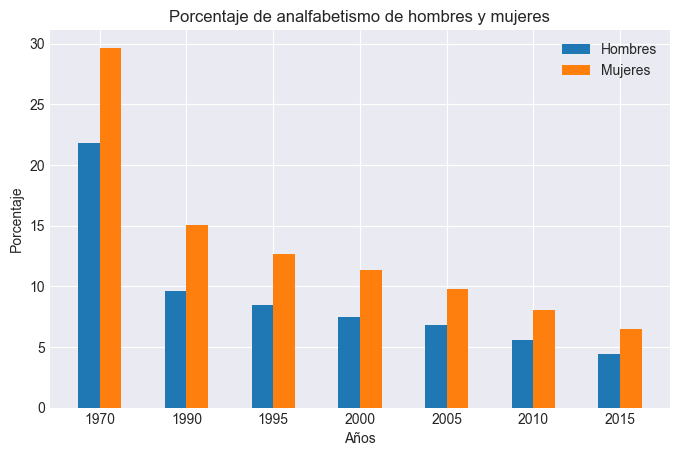

In [ ]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 100)

ax.bar(a1 - ancho/2, df_analfabetismoNacional['Porcentaje de analfabetas hombres'].values, width = ancho, label = 'Hombres')
ax.bar(a1 + ancho/2, df_analfabetismoNacional['Porcentaje de analfabetas mujeres'].values, width = ancho, label  = 'Mujeres')

ax.set(title = 'Porcentaje de analfabetismo de hombres y mujeres', xlabel = 'Años', ylabel = 'Porcentaje')
ax.set_xticks(a1, labels)


plt.legend()
plt.show()

#### 1.3.   Gasto nacional en educación total como porcentaje del PIB vs Eficiencia terminal en educación media superior

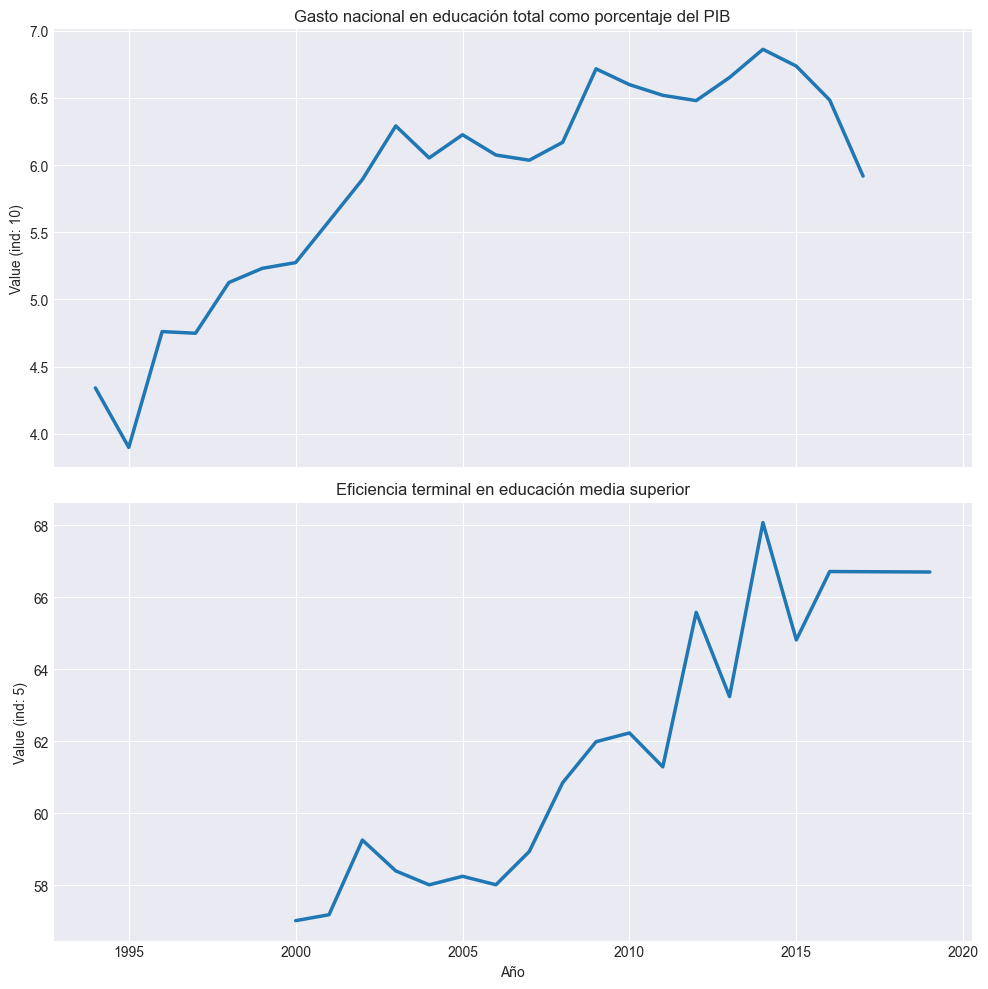

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (10,10), dpi = 100, sharex = True)

sns.lineplot(ax = axs[0], data = df_educacionNacional['Value (ind: 10)'], linewidth = 2.5, legend = False)
axs[0].set(title = 'Gasto nacional en educación total como porcentaje del PIB')


sns.lineplot(ax = axs[1], data = df_educacionNacional['Value (ind: 5)'], linewidth = 2.5, legend = False)
axs[1].set(title = 'Eficiencia terminal en educación media superior', xlabel = 'Año')

plt.tight_layout()
plt.show()

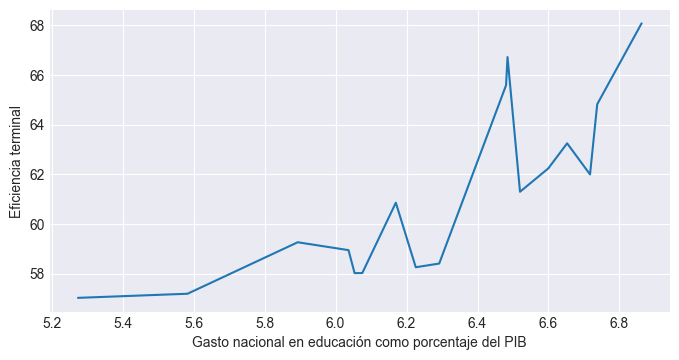

In [ ]:
fig, ax = plt.subplots(figsize = (8,4), dpi = 100)

sns.lineplot(x = df_educacionNacional['Value (ind: 10)'], y = df_educacionNacional['Value (ind: 5)'])
ax.set(ylabel = 'Eficiencia terminal', xlabel = 'Gasto nacional en educación como porcentaje del PIB')

plt.show()

C:\Users\joanl\AppData\Local\Temp\ipykernel_14584\3269467389.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[0,0])


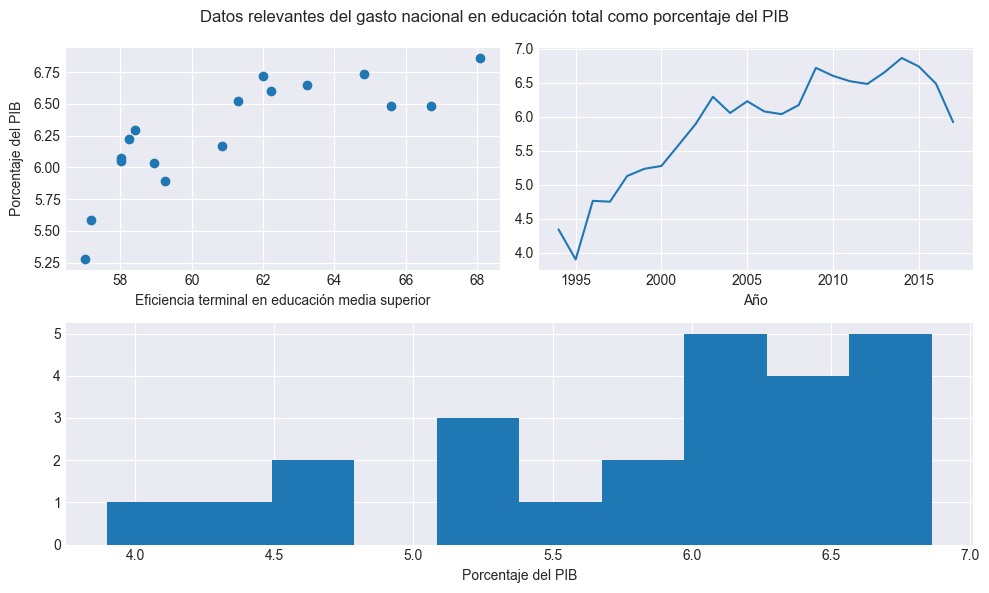

In [ ]:
fig = plt.subplots(figsize = (10,6), dpi = 100)

grid = plt.GridSpec(2,2)

plt.subplot(grid[0,0])
plt.scatter(data = df_educacionNacional, x = 'Value (ind: 5)', y = 'Value (ind: 10)')
plt.xlabel('Eficiencia terminal en educación media superior')
plt.ylabel('Porcentaje del PIB', labelpad = 7)

plt.subplot(grid[0,1:])
plt.plot(df_educacionNacional['Value (ind: 10)'])
plt.xlabel('Año')

plt.subplot(grid[1,:])
plt.hist(df_educacionNacional['Value (ind: 10)'])
plt.xlabel('Porcentaje del PIB')

plt.suptitle('Datos relevantes del gasto nacional en educación total como porcentaje del PIB')
plt.tight_layout()
plt.show()

#### 1.4.   Pairplot de indicadores 1 a 4 para todos los estados

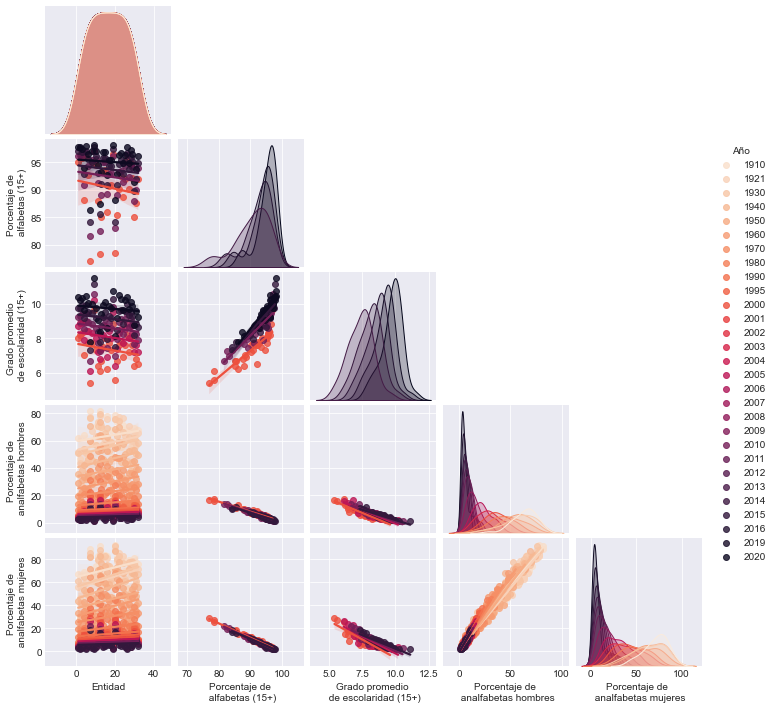

In [ ]:
df_educacionEstados1a4 = df_educacionEstados.replace(-1,np.nan).loc[:, 'Año': 'Valor (ind: 4)'].rename(columns = {
    'Valor (ind: 1)' : 'Porcentaje de \n alfabetas (15+)',
    'Valor (ind: 2)' : 'Grado promedio \n de escolaridad (15+)',
    'Valor (ind: 3)' : 'Porcentaje de \n analfabetas hombres',
    'Valor (ind: 4)' : 'Porcentaje de \n analfabetas mujeres',    
})

sns.pairplot(df_educacionEstados1a4, 
             palette = "rocket_r",
             hue = 'Año', 
             kind = 'reg',
             height = 2,
             plot_kws={'marker' : 'o'},
             corner = True)

plt.show()

### 2.  Gráficas de entidades/estados

##### 2.1.  Reemplazar valores -1 a NaN

In [ ]:
df_educacionEstados.replace(-1,np.nan, inplace = True)
df_educacionEstados;

#### 2.2.   Niveles de educación por entidad/estado

In [ ]:
dic_indicadores_niveleseducacion = {
    'Valor (ind: 6)':'Educacion basica (15+)',
    'Valor (ind: 7)':'Educacion tecnica o comercial (19+)',
    'Valor (ind: 8)':'Bachillerato (19+)',
    'Valor (ind: 9)':'Educacion superior (24+)',
}
df_NivelesEducacion = df_educacionEstados[['Año','Entidad','Valor (ind: 6)','Valor (ind: 7)','Valor (ind: 8)','Valor (ind: 9)']].rename(
    columns=dic_indicadores_niveleseducacion).reset_index(drop=True)
for i in range(len(df_estados)):
    df_NivelesEducacion['Entidad'] = df_NivelesEducacion['Entidad'].replace(df_NivelesEducacion['Entidad'][i], df_estados['ENTIDAD_FEDERATIVA'][i])
    
df_NivelesEducacion

,Año,Entidad,Educacion basica (15+),Educacion tecnica o comercial (19+),Bachillerato (19+),Educacion superior (24+)
0,1910,AGUASCALIENTES,NaN,NaN,NaN,NaN
1,1910,BAJA CALIFORNIA,NaN,NaN,NaN,NaN
2,1910,BAJA CALIFORNIA SUR,NaN,NaN,NaN,NaN
3,1910,CAMPECHE,NaN,NaN,NaN,NaN
4,1910,COAHUILA DE ZARAGOZA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
923,2020,TAMAULIPAS,NaN,NaN,NaN,NaN
924,2020,TLAXCALA,NaN,NaN,NaN,NaN
925,2020,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,NaN,NaN,NaN
926,2020,YUCATÁN,NaN,NaN,NaN,NaN


In [ ]:
df_NivelesEducacion.describe()

,Año,Educacion basica (15+),Educacion tecnica o comercial (19+),Bachillerato (19+),Educacion superior (24+)
count,928.000000,6.400000e+01,128.000000,9.600000e+01,9.600000e+01
mean,1990.379310,1.300684e+06,64424.507812,2.093170e+05,1.995972e+05
std,31.055549,1.098849e+06,86914.347365,2.448434e+05,2.653433e+05
min,1910.000000,1.663590e+05,9456.000000,1.733900e+04,1.305700e+04
25%,1980.000000,6.108515e+05,18801.250000,6.636125e+04,5.554175e+04
50%,2004.000000,9.997080e+05,36341.500000,1.302730e+05,1.040245e+05
75%,2011.000000,1.599338e+06,61270.750000,2.554578e+05,2.137882e+05
max,2020.000000,5.971664e+06,429856.000000,1.565560e+06,1.628840e+06


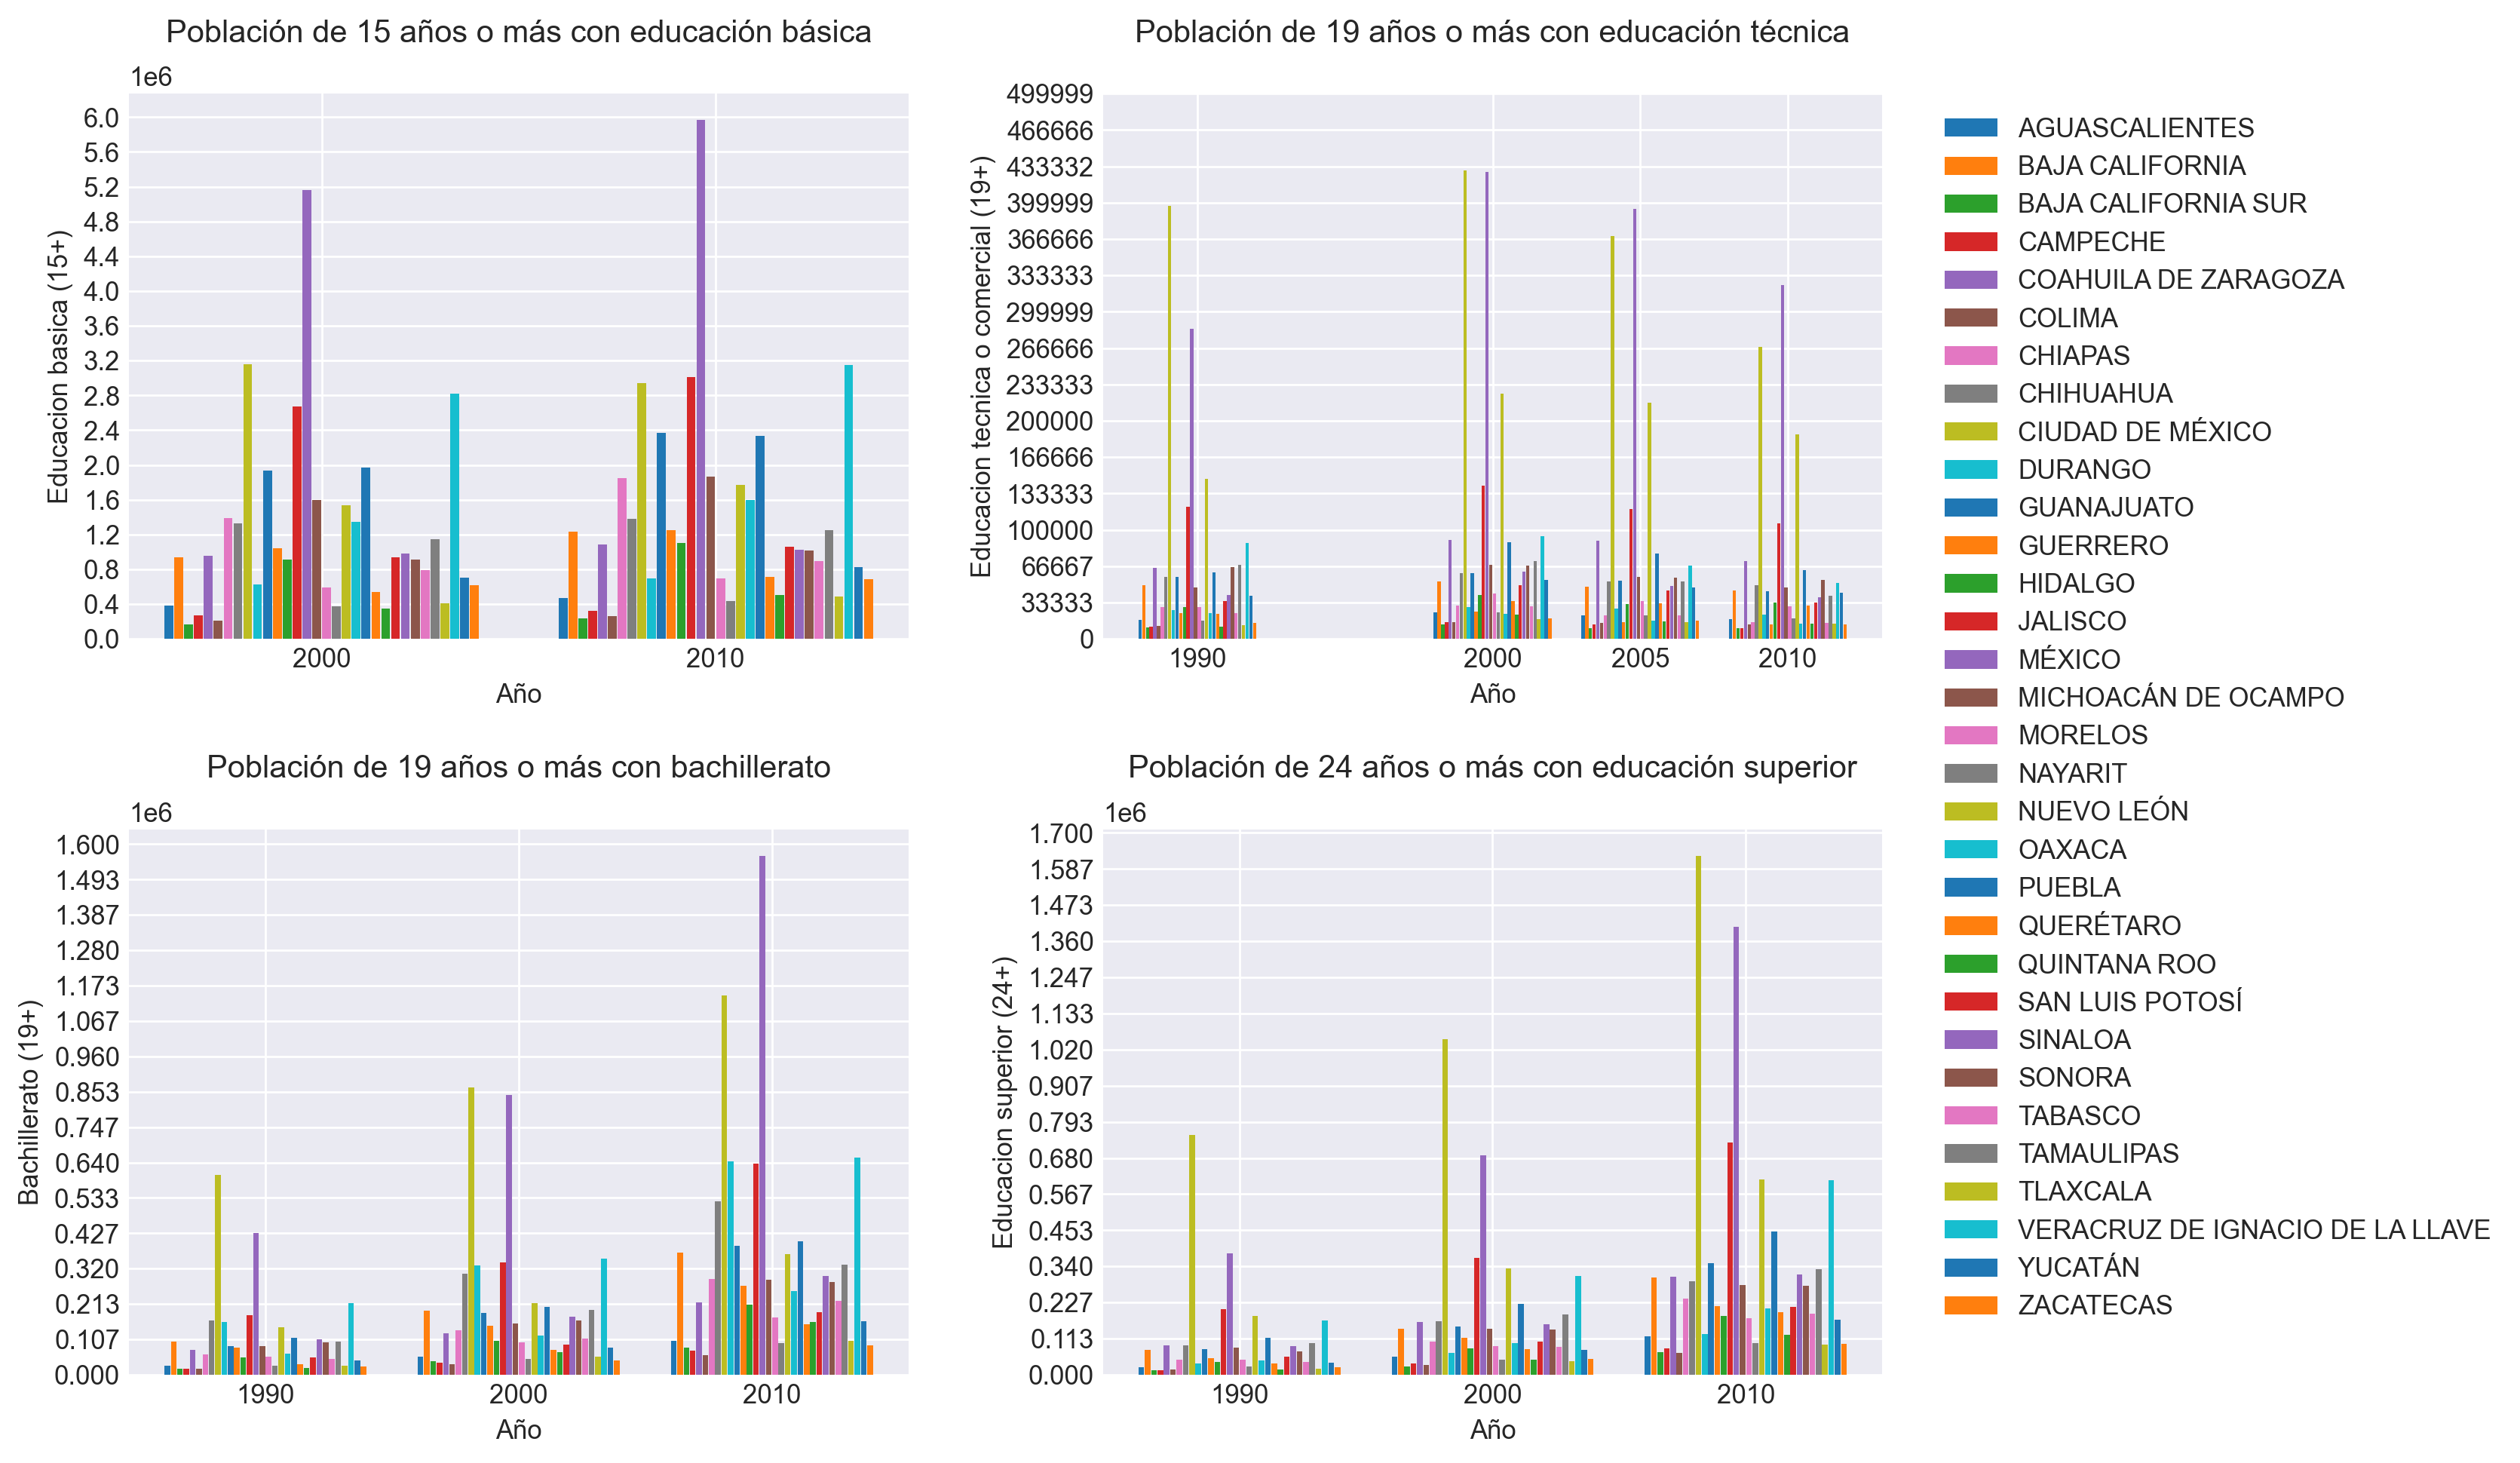

In [ ]:
fig = plt.subplots(figsize=(12,9),dpi=250)
plt.clf() #MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
plt.subplots_adjust(hspace=0.35,wspace=0.25)
ax = [0,1,2,3]
ax[0] = plt.subplot2grid((2, 2), (0, 0))
ax[1] = plt.subplot2grid((2, 2), (0, 1))
ax[2] = plt.subplot2grid((2, 2), (1, 0))
ax[3] = plt.subplot2grid((2, 2), (1, 1))
titulos = [
    'Población de 15 años o más con educación básica',
    'Población de 19 años o más con educación técnica',
    'Población de 19 años o más con bachillerato',
    'Población de 24 años o más con educación superior'
]

#Numero de estados, debe ser 32
num_edos = len(df_NivelesEducacion['Entidad'].unique())

for j in range(4):

    lista_años = df_NivelesEducacion.iloc[:,[0,j+2]].dropna()['Año'].unique()
    #Rango de años donde se colocarán las barras. Depende de la diferencia entre los dos ultimos años de registro
    n = lista_años.tolist()[-1] - lista_años.tolist()[-2]

# Ciclo for que itera sobre el número de estados
    for i in range(num_edos):
        #Máscara ue indica la entidad. Ejemplo: df_NivelesEducacion['Entidad'].iloc[0] = 'AGUASCALIENTES'.
        entidad = df_NivelesEducacion['Entidad'].iloc[i]
        mask = df_NivelesEducacion['Entidad'] == entidad
        #DataFrame temporal por entidad
        df_i = df_NivelesEducacion[mask]

        x = df_NivelesEducacion['Año'].unique()+(0.8/num_edos*(i+0.5)-0.4)*n
        width = n*0.8/num_edos

        ax[j].bar(data=df_i,x=x,height=df_NivelesEducacion.columns[j+2],width=0.9*width,label=entidad,zorder=2)
        #Explicación de x: x es el año, se espera que las barras ocupen de -0.4*n a 0.4*n alrededor de x, donde n es un número que indica el límite de años que las barras afectarán; se espera que sea menor al doble del rango entre los años unicos para que no se sobre escriban, se usó 0.4 (en lugar de 0.5 por ejemplo) para que usando el doble del rango nunca se topen los años. 0.8 es 0.4*2. El valor de 0.5 en (i+0.5) sirve para que las barras estén centradas en el año deseado, y la división sea pareja
            #df_NivelesEducacion['Año'].unique() son los años en el dataframe. Por el dropna() al generar df_NivelesEducacion se entienque que compartirán los mismos años todos los datos
        #Explicación de width: teniendo que habrán que separaciones de n*0.8/num_edos, se tomó el valor completo. Si se quiere disminuir, se puede usar un valor porcentual 0.9*width por ejemplo.

    #ax.bar(data=df_NivelesEducacion[df_NivelesEducacion['Entidad'] == 'YUCATÁN'],x='Año',height='Educación básica (15+)',width=0.1,label=df_NivelesEducacion['Entidad'].iloc[0])

    ax[j].set_title(titulos[j],pad=20)
    ax[j].set_xticks(lista_años)
    ax[j].set_xlabel('Año')
    maximo = math.ceil(df_NivelesEducacion.iloc[:,j+2].max()/100000)*100000
    ax[j].set_yticks(np.arange(0, maximo+1, step=(maximo-1)/15))
    ax[j].set_ylabel(df_NivelesEducacion.columns[j+2])
    ax[j].grid(axis='y',zorder=0)

ax[1].legend(loc='upper left',bbox_to_anchor=(1.05, 1))

plt.show()

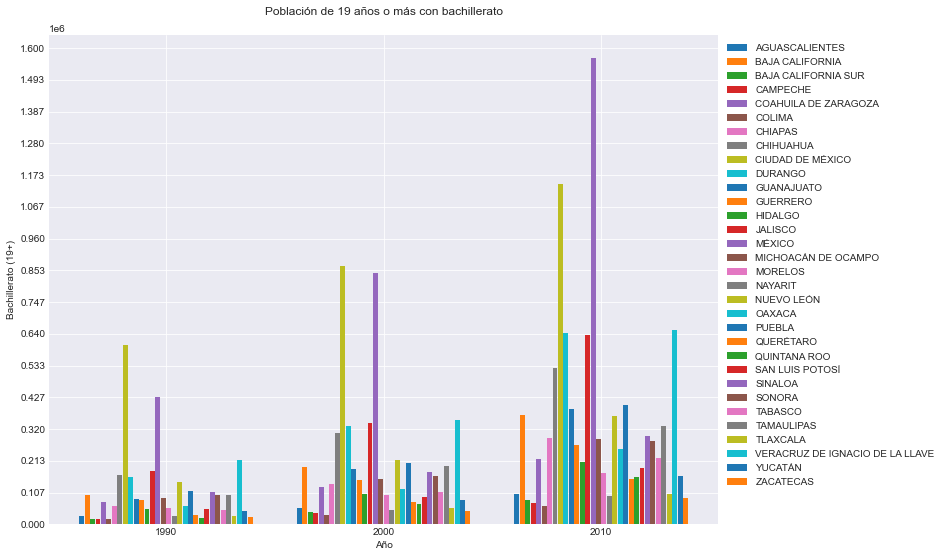

In [ ]:
Entrada_de_Usuario = 3
num_indicador = str(5+Entrada_de_Usuario)

df_Educacion = df_educacionEstados[['Año','Entidad',f'Valor (ind: {num_indicador})']].dropna()
for i in range(len(df_estados)):
    df_Educacion['Entidad'][df_Educacion['Entidad'] == i+1] = df_estados['ENTIDAD_FEDERATIVA'][i]
    
df_Educacion.rename(columns={f'Valor (ind: {num_indicador})':dic_indicadores_niveleseducacion[f'Valor (ind: {num_indicador})']},inplace=True)
fig, ax = plt.subplots(figsize=(12,9))

#Años en el dataframe. Por el dropna() al generar df_Educacion se entienque que compartirán los mismos años todos los datos
x = df_Educacion['Año'].unique()

#Numero de estados
num_edos = len(df_Educacion['Entidad'].unique())
#Rango de años donde se colocarán las barras
n=df_Educacion['Año'].unique()[-1]-df_Educacion['Año'].unique()[-2]

# Ciclo for que itera sobre el número de estados
for i in range(num_edos):
    #Máscara ue indica la entidad. Ejemplo: df_Educacion['Entidad'].iloc[0] = 'AGUASCALIENTES'.
    entidad = df_Educacion['Entidad'].iloc[i]
    mask = df_Educacion['Entidad'] == entidad
    #DataFrame temporal por entidad
    df_i = df_Educacion[mask]

    x = df_Educacion['Año'].unique()+(0.8/num_edos*(i+0.5)-0.4)*n
    width = n*0.8/num_edos

    ax.bar(data=df_i,x=x,height=df_Educacion.columns[2],width=0.9*width,label=entidad,zorder=2)
    #Explicación de x: x es el año, se espera que las barras ocupen de -0.4*n a 0.4*n alrededor de x, donde n es un número que indica el límite de años que las barras afectarán; se espera que sea menor al doble del rango entre los años unicos para que no se sobre escriban, se usó 0.4 (en lugar de 0.5 por ejemplo) para que usando el doble del rango nunca se topen los años. El valor de 0.5 en (i+0.5) sirve para que las barras estén centradas en el año deseado, y la división sea pareja
    #Explicación de width: teniendo que habrán que separaciones de n*0.8/num_edos, se tomó el valor completo. Si se quiere disminuir, se puede usar un valor porcentual 0.9*width por ejemplo.

#ax.bar(data=df_Educacion[df_Educacion['Entidad'] == 'YUCATÁN'],x='Año',height='Educación básica (15+)',width=0.1,label=df_Educacion['Entidad'].iloc[0])

ax.set_title(titulos[int(num_indicador)-6],pad=20)
ax.set_xticks(df_Educacion['Año'].unique())
ax.set_xlabel('Año')
maximo = math.ceil(df_NivelesEducacion.iloc[:,int(num_indicador)-4].max()/100000)*100000
ax.set_yticks(np.arange(0, maximo+1, step=(maximo-1)/15))
ax.set_ylabel(df_NivelesEducacion.columns[int(num_indicador)-4])
ax.grid(axis='y',zorder=0)
ax.legend(loc='upper left',bbox_to_anchor=(1, 1))

#### 2.3.   Efiencia terminal en nivel medio superior por entidad/estado

In [ ]:
dic_estados = {}
for i in range(len(df_estados)):
    dic_estados[df_estados['CLAVE_ENTIDAD'][i]] = df_estados['ENTIDAD_FEDERATIVA'][i]
    
dic_estados[31]

'YUCATÁN'

In [ ]:
df_EficienciaEMSEstados = df_educacionEstados[['Año','Entidad','Valor (ind: 5)']].dropna().pivot(columns = 'Año', index = 'Entidad', values = 'Valor (ind: 5)').rename(index = dic_estados)
df_EficienciaEMSEstados.head()

Año,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2019
Entidad,,,,,,,,,,,,,,,,,,
AGUASCALIENTES,56.464235,57.300404,56.911591,58.450653,56.354632,61.781371,58.621600,64.281319,64.189523,65.020478,62.104472,60.950837,65.024843,66.461300,66.281620,65.947125,66.834736,68.908345
BAJA CALIFORNIA,52.011666,52.915234,57.566256,54.177240,53.778817,49.899065,53.051402,52.948638,53.354774,54.849590,56.517664,58.692478,59.664169,55.849730,61.252791,59.283003,62.709605,65.507408
BAJA CALIFORNIA SUR,50.811665,54.677936,57.650673,53.319172,53.062492,52.444550,50.616051,52.695942,56.719278,59.431353,61.656604,66.839378,65.245366,62.945679,68.366133,63.872907,66.464249,71.956245
CAMPECHE,55.351650,56.655001,58.052396,54.005962,53.937842,57.612616,55.106829,58.801434,58.315592,59.751073,60.961087,56.753226,61.716676,59.718112,63.736348,62.079715,61.245878,67.914404
COAHUILA DE ZARAGOZA,58.848403,55.962012,60.596007,62.719843,60.148778,57.750991,59.927145,57.513086,60.652606,59.175333,62.569357,61.061947,59.565370,62.940206,63.261871,61.232556,65.600161,65.258734


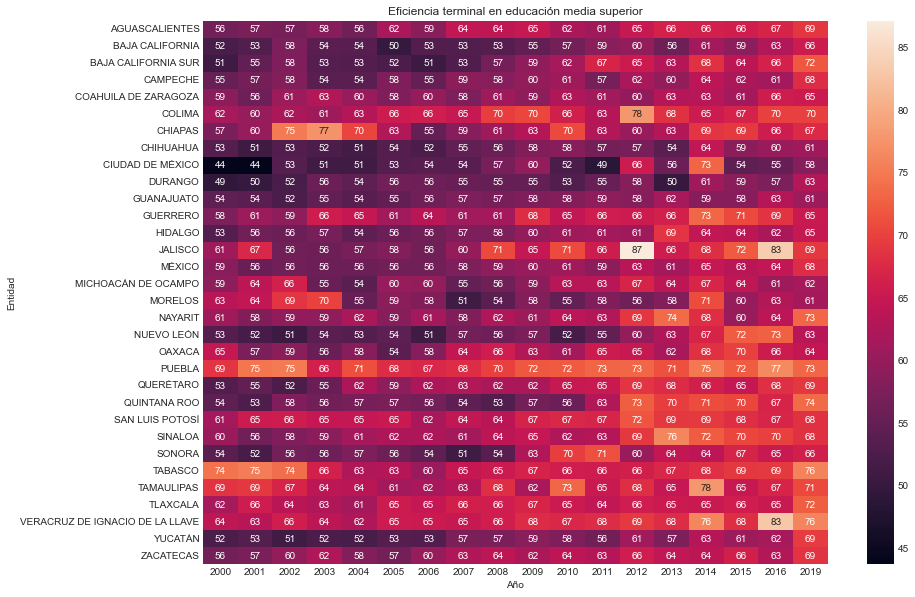

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df_EficienciaEMSEstados,ax=ax,annot=True)

ax.set_title('Eficiencia terminal en educación media superior')

plt.show()